In [51]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict

In [52]:
class BatsmanState(TypedDict): 
    runs: int
    balls: int
    fours: int
    sixes: int

    sr: float  # stike rate
    bpb: float   # balls per boundry
    bp: float   # boundry percent
    summary: str 
    

In [ ]:
def calculate_sr(state: BatsmanState): 

    sr=(state['runs']/state['balls'])*100

    return {'sr': sr}

In [ ]:
def calculate_bpb(state: BatsmanState):   # How many balls a batsman plays on average to hit one boundary (4 or 6).

    bpb=(state['balls']/(state['fours']+state['sixes']))

    return {'bpb': bpb}

In [ ]:
def calculate_bp(state: BatsmanState):   # 

    bp= (((state['fours'] * 4) + (state['sixes'] * 6))/state['runs'])*100

    return {'bp': bp}

In [ ]:
def summary(state: BatsmanState):

    summary = f"""
                Strike Rate - {state['sr']} \n
                Balls per boundary - {state['bpb']} \n
                Boundary percent - {state['bp']}
               """
    
    return {'summary': summary}

In [57]:
# define graphs: 
graph=StateGraph(BatsmanState)

# define_nodes: 
graph.add_node('calculate_sr', calculate_sr)
graph.add_node('calculate_bpb', calculate_bpb)
graph.add_node('calculate_bp', calculate_bp)
graph.add_node('summary', summary)



# add edges: 

graph.add_edge(START, 'calculate_sr')
graph.add_edge(START, 'calculate_bpb')
graph.add_edge(START, 'calculate_bp')

graph.add_edge('calculate_sr', 'summary')
graph.add_edge('calculate_bpb', 'summary')
graph.add_edge('calculate_bp', 'summary')

graph.add_edge('summary', END)


# compile: 
workflow=graph.compile()

In [58]:
# execute: 

intial_state = {
    'runs': 100,
    'balls': 50,
    'fours': 6,
    'sixes': 4
}

workflow.invoke(intial_state)

{'runs': 100,
 'balls': 50,
 'fours': 6,
 'sixes': 4,
 'sr': 200.0,
 'bpb': 5.0,
 'bp': 48.0,
 'summary': '\n                Strike Rate - 200.0 \n\n                Balls per boundary - 5.0 \n\n                Boundary percent - 48.0\n               '}

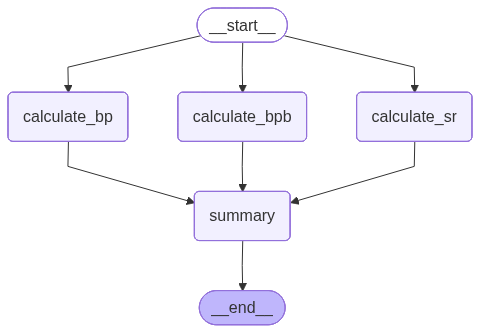

In [59]:
workflow